In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
from dateutil import parser

In [2]:
# Import appdata.csv file. I have used the dataframe as df but you can choose whatever name 
# but you just have to careful with the code
data = pd.read_csv('appdata.csv', encoding= 'ISO-8859-1')

Exploratory Data Analysis


In [3]:
# Use the info, describe and head function to check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
data.shape

(50000, 12)

In [5]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


Q. Why is hour column not in the list of the describe function?
The Hour column is not available in describe function because it is not a numerical field. While using Describe numerical columns on which operations such as Minimum, maximum, Quartile ranges, mean etc. are taken and shown. As on a Date field these operations can't be performed so Hour is missing from the list 

In [7]:
# Just check for hour column separately
data['hour']


0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

Data Pre-processing

In [8]:
#  Write code to check for all the missing values
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [9]:
# Change hour variable to integer using the slice function and update the dataframe
data.hour.str.slice(0,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [10]:
# Enrolled is the variable of interest or the dependent variable and user is not needed at this time, 
#screen_list, enrolled date and first open are object types
# Remove these columns and create a new dataframe of just the numeric variables and name it whatever 
#you want I have name
new_data= data.drop(['user','hour','first_open','screen_list', 'enrolled_date'], axis=1)

In [11]:
# Check the new data frame using the head function
new_data.head()

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,23,15,0,0,0,0
1,6,24,13,0,0,0,0
2,1,23,3,0,1,0,1
3,4,28,40,0,0,1,0
4,1,31,32,0,0,1,1


Plots

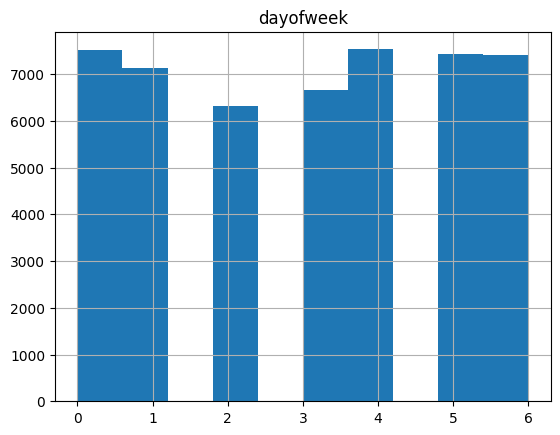

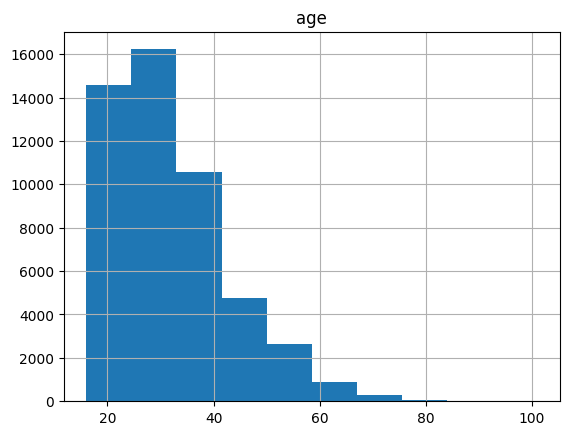

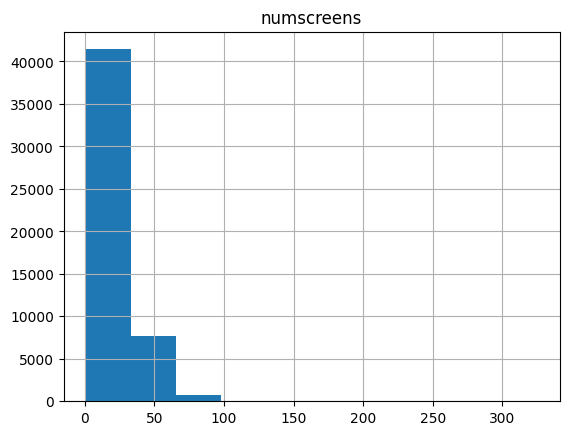

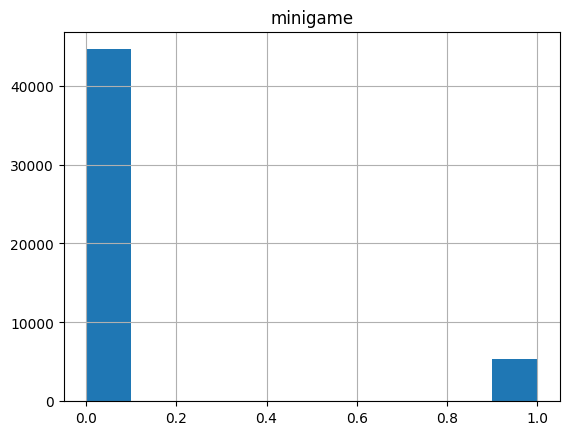

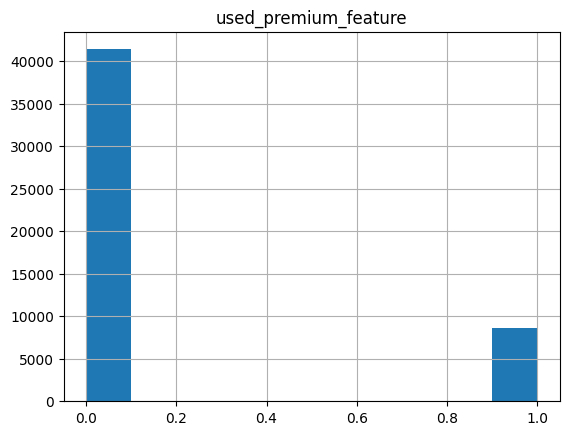

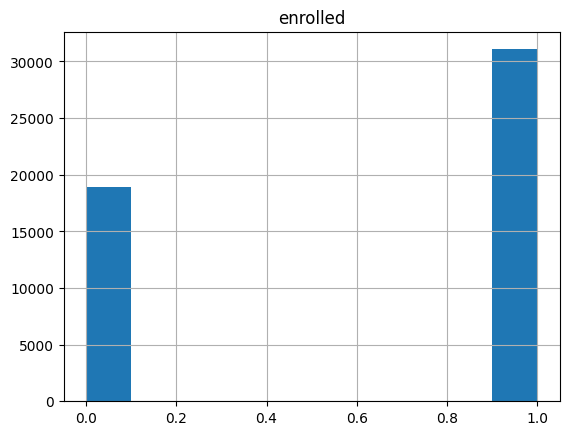

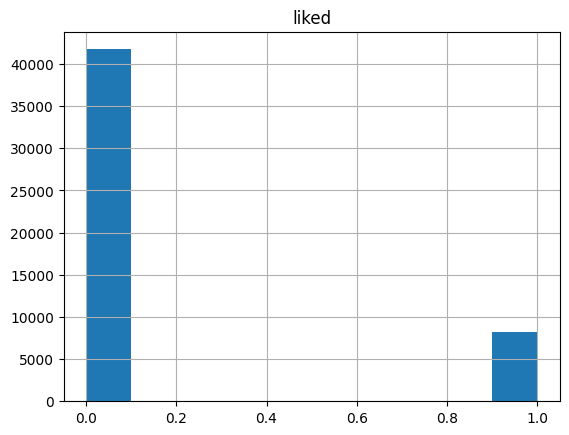

In [12]:
# The simple way
for i in new_data.columns:
      new_data.hist(i)

# The complicated way or the nice way 
# use the code from the first project tweak it a little bit and create pretty looking histogram

array([[<AxesSubplot:title={'center':'dayofweek'}>]], dtype=object)

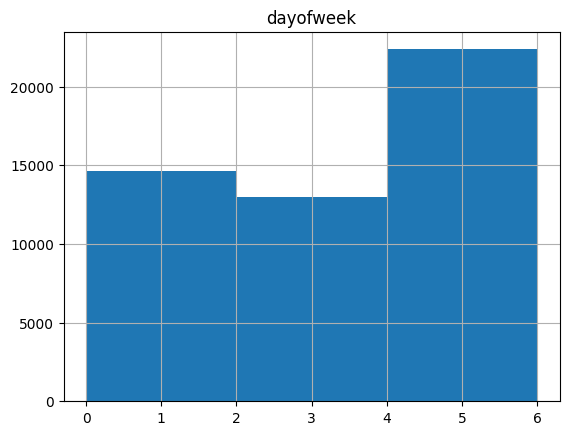

In [13]:
new_data.hist(column='dayofweek', bins=3)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

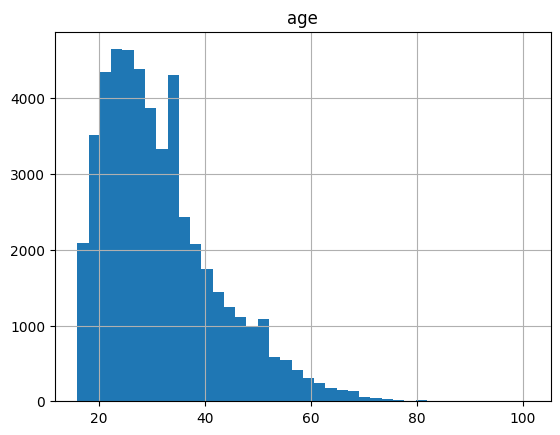

In [14]:
new_data.hist(column='age', bins = 40)

array([[<AxesSubplot:title={'center':'numscreens'}>]], dtype=object)

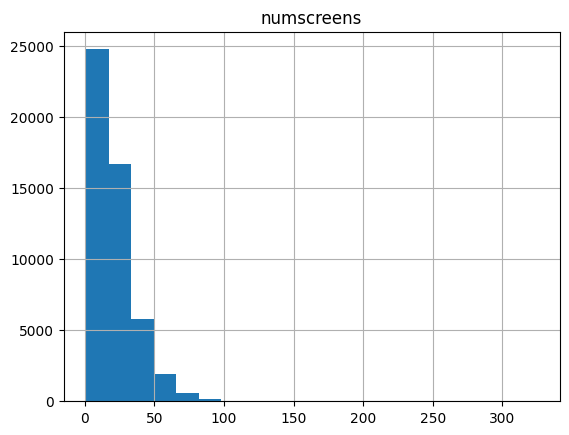

In [15]:
new_data.hist(column='numscreens', bins=20)

Q. What do you observe

HIstograms show where most of the customers fall as per the columns/features we are analyzing, here 3 features are considered -  day of week, age and number of screens

Dayofweek: most of the users try the app on weekday 5 or 6 , or saturday/sunday - whereas other days are quite low on turnout 

age: Histogram shows that most of the users are lower aged, so as the age grows the usage becomes less (inversely proportional)

numscreens: Histogram shows that most of the users 0-20 screens (~25000), further bins 20 -40 is also one major category but very few customers go beyond 40 screens

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

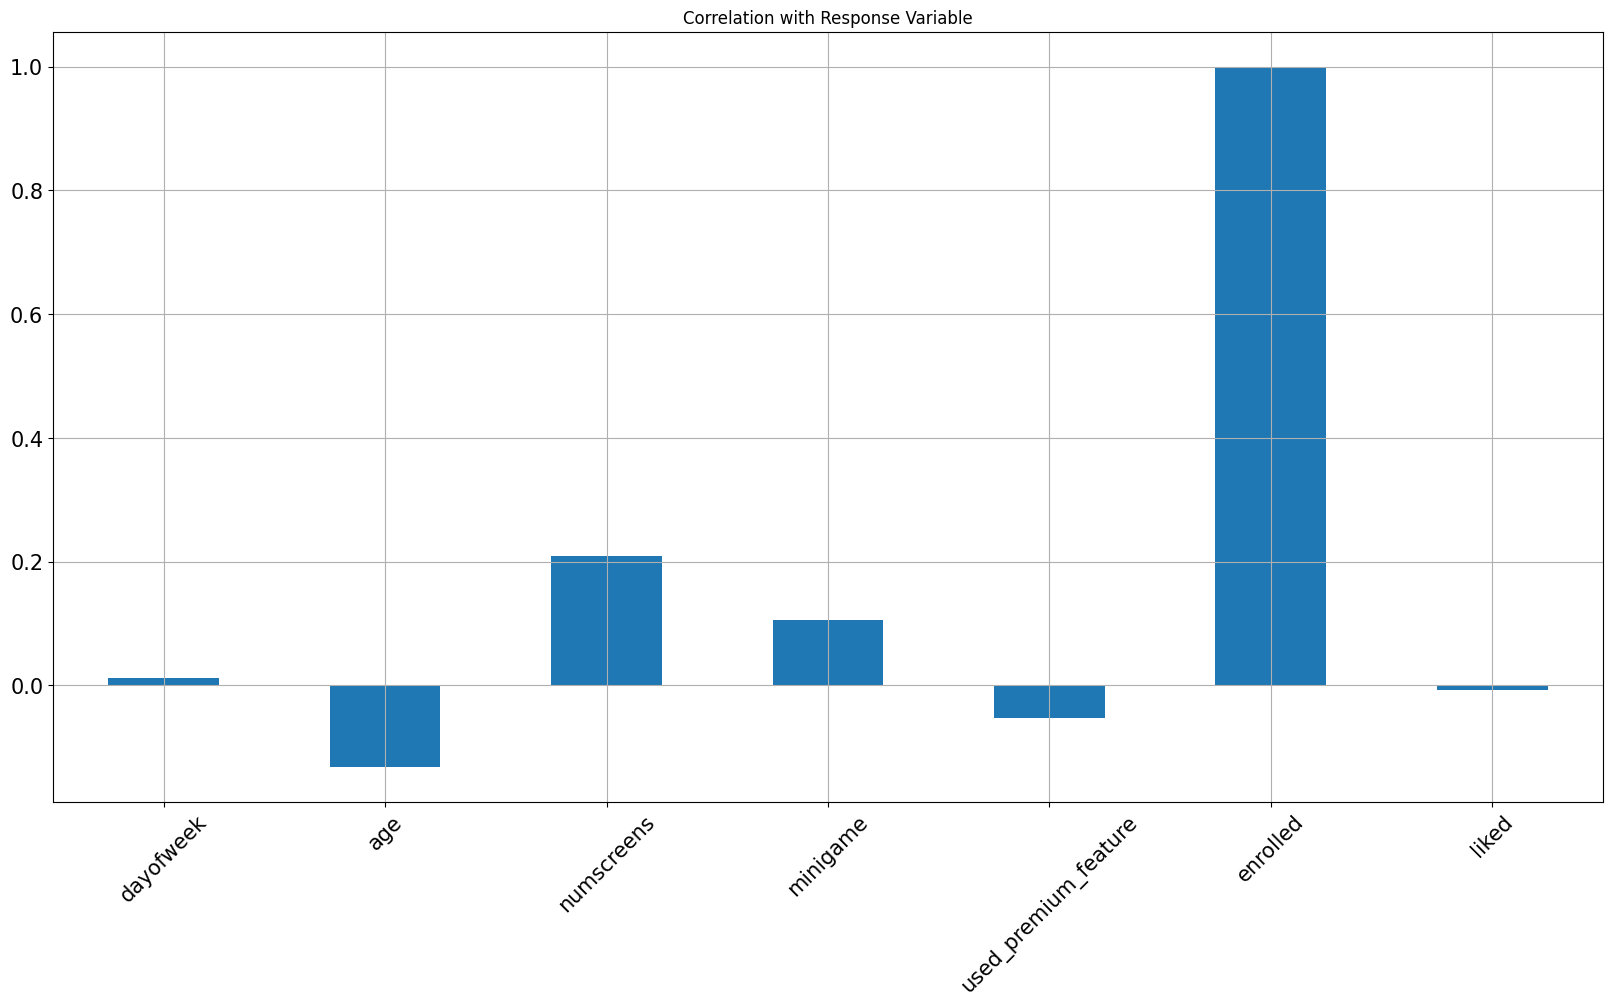

In [16]:
# Correlation Plot with the Response variable
new_data.corrwith(data.enrolled).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   fontsize = 15, rot = 45, grid = True)














                                   

Q. Comment on the plot

By looking on the correlation plot it shows how the feature is related to the enrolled (label) - age is negatively related whereas Dayof week and Numscreens are positively related.

Correlation Plot the nicer way

In [17]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = new_data.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

/tmp/ipykernel_110/2027045727.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<AxesSubplot:>

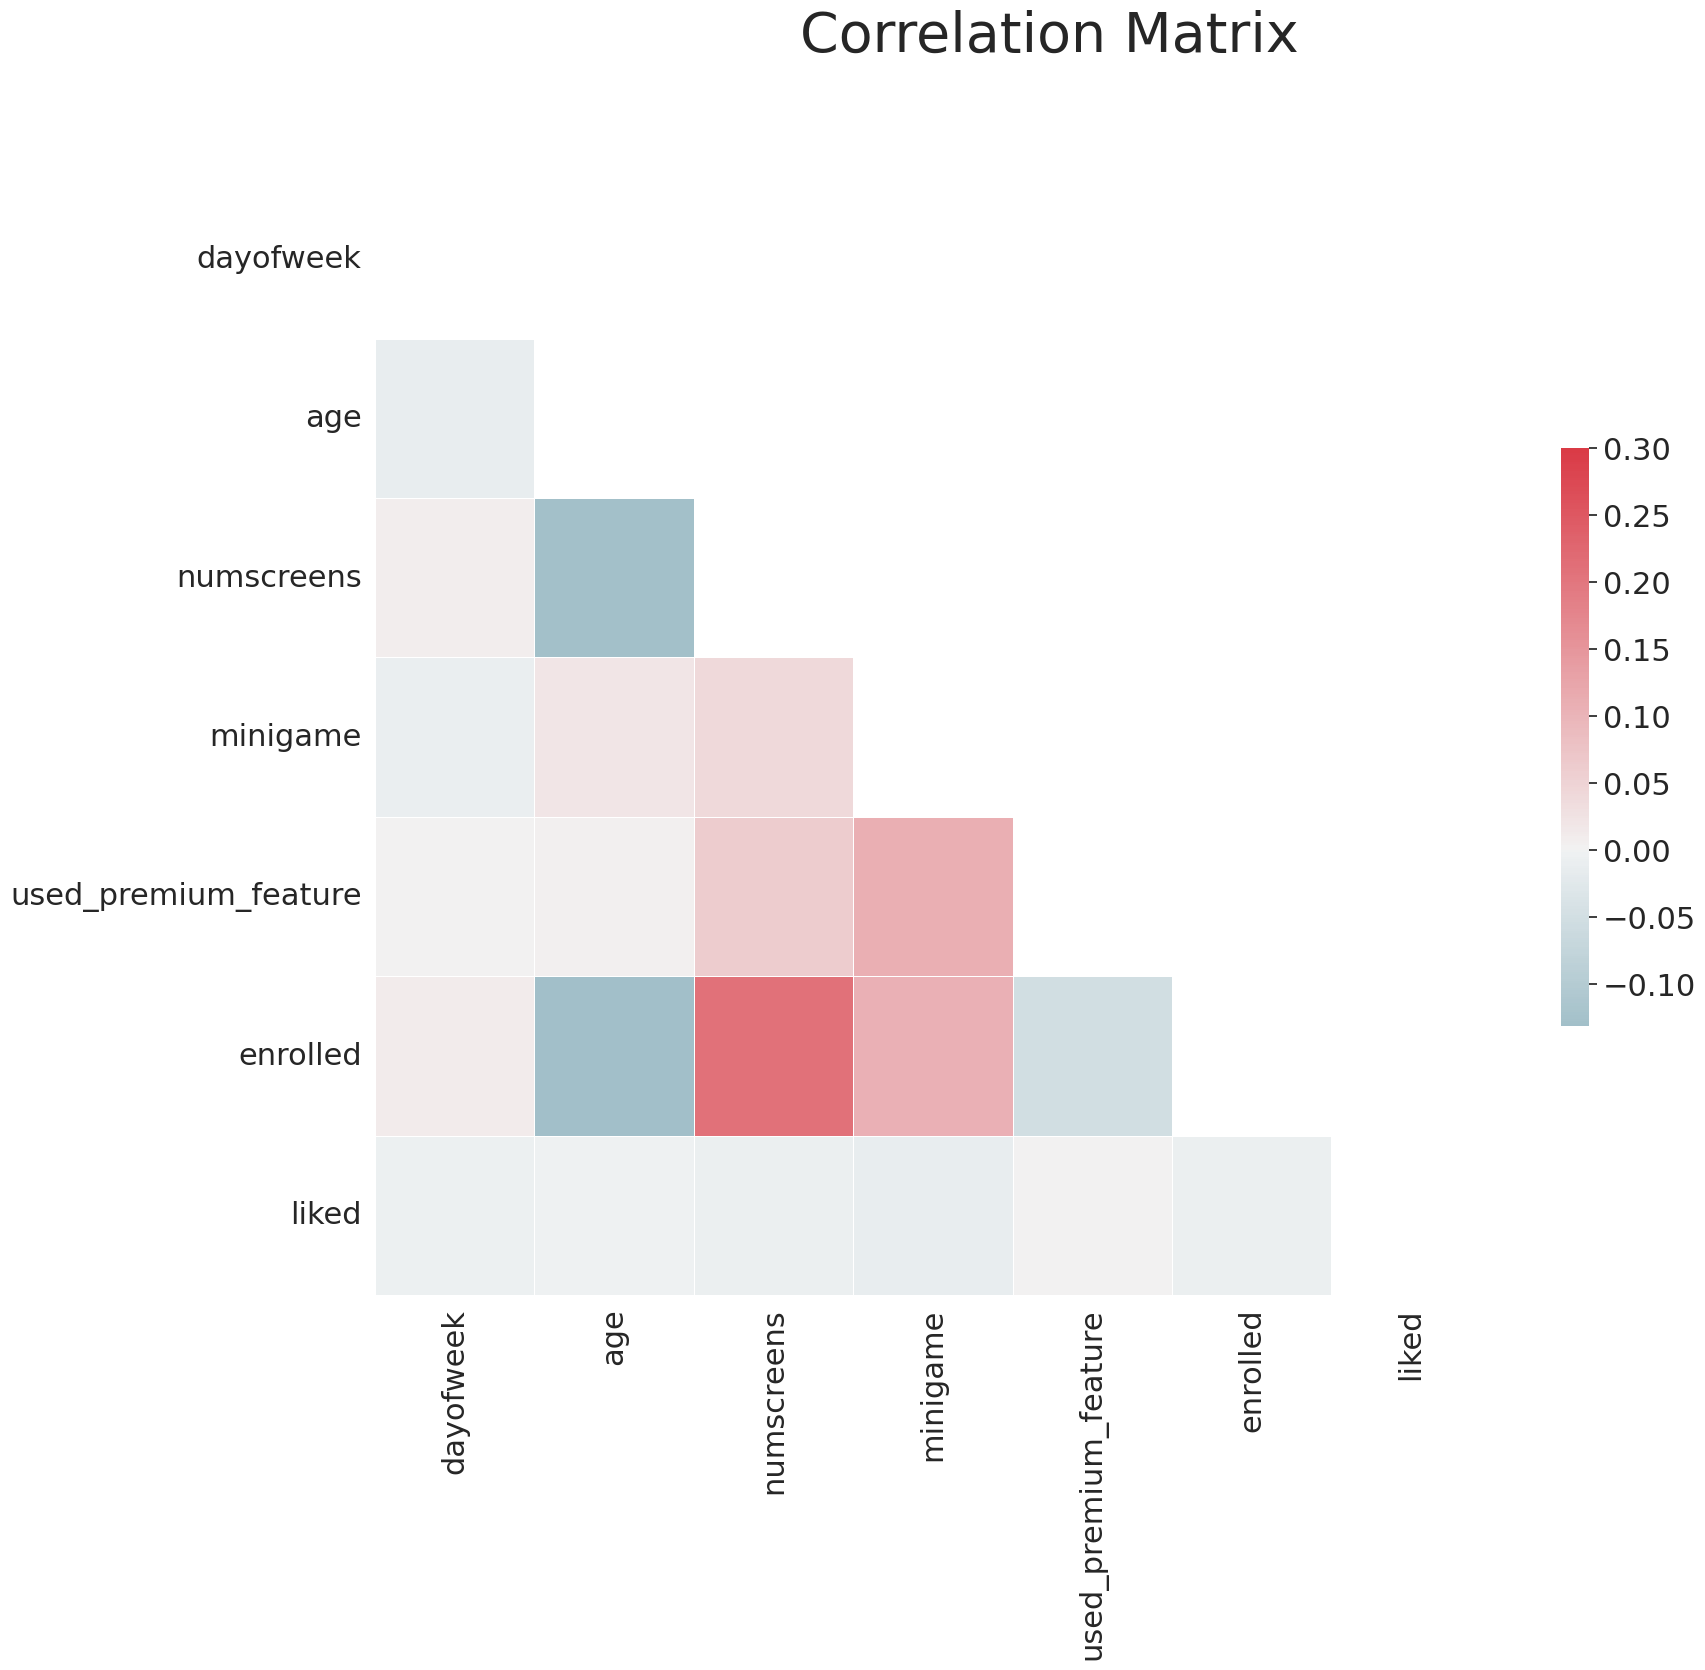

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#correlation
correlation = new_data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [20]:
#convert to array
corr_array  = np.array(correlation)
correlation

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
dayofweek,1.000000,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737
age,-0.012326,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593
numscreens,0.007925,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349
minigame,-0.008631,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250
used_premium_feature,0.001439,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690
enrolled,0.011326,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022
liked,-0.005737,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000


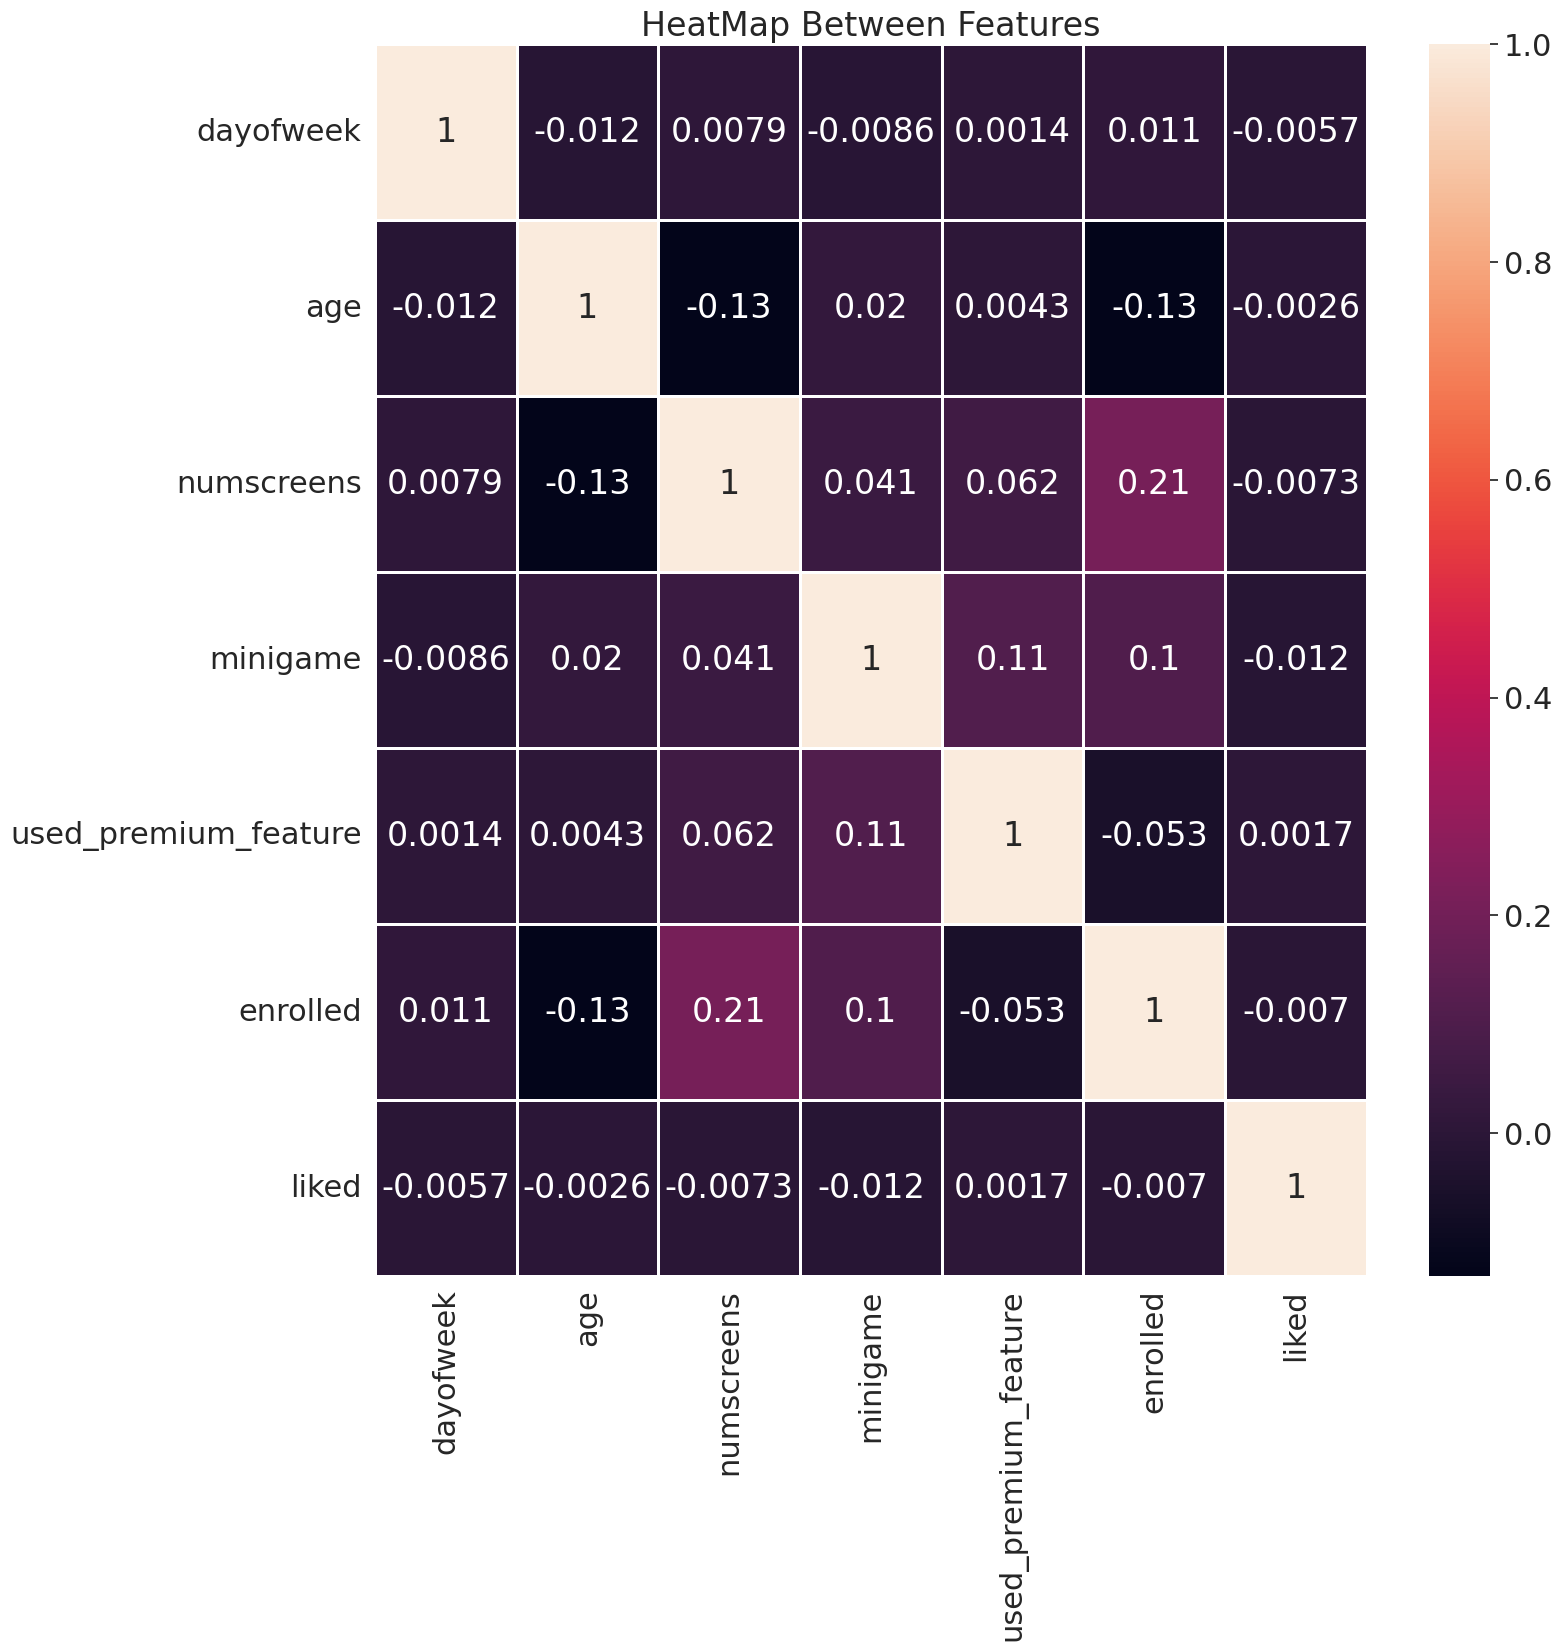

In [21]:
#Create a heat map of correlation matrix by using the same code from the first project and tweaking it
# Should look something like what you see below
#Plotting
df_corr = new_data.corr()

plt.figure(figsize=(16,16))
heat_map = sns.heatmap( df_corr, linewidth = 1 , annot = True)
plt.title( "HeatMap Between Features" )
plt.show()

Q. Comment on the heat map

Heat map correlation shows correlation between features, the above graph shows not only +ve or _ve relation but also the strength of their relation, a very high positive or negative number shows how much the features are correlated and either directly or inversely. example: number of screens and age have relation value and strength as -0.13, which means they are inversely related with comparatively higher strength. on the other hand enrolled have a positive relation of 0.21 with number of screens 


Feature Engineering Process
Lets first look at the target variable (enrolled)

In [22]:
new_data.dtypes

dayofweek               int64
age                     int64
numscreens              int64
minigame                int64
used_premium_feature    int64
enrolled                int64
liked                   int64
dtype: object

In [23]:
data['enrolled_date'] = pd.to_datetime(data['enrolled_date'])
data['first_open'] = pd.to_datetime(data['first_open'])

In [24]:
# Check for the datatypes
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [25]:
# Calculate the difference in the two dates to give the result in hours
data['difference'] = data['enrolled_date'] - data['first_open']

In [26]:
data['difference'] = data['difference'].apply(lambda x: x.total_seconds()/(60*60))
data['difference']

0             NaN
1             NaN
2             NaN
3        0.050877
4        0.096994
           ...   
49995    0.026390
49996         NaN
49997         NaN
49998    0.042895
49999         NaN
Name: difference, Length: 50000, dtype: float64

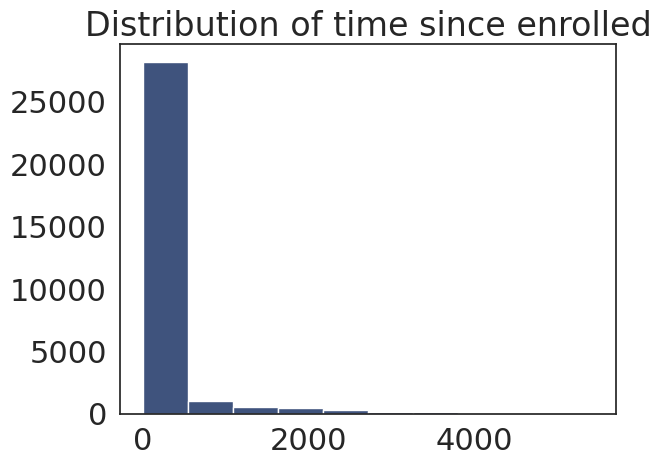

In [27]:
# Plot histogram of the difference variable
plt.hist(data['difference'].dropna(), color ='#3F537D')
plt.title('Distribution of time since enrolled')
plt.show()

Q. Comment on the distribution?

The distribution shows that most of the duration is of short range (0-450 hours) and it has around 25-30K entries, this means most of the users enroll the app after this much amount of time after first usage of the app. 

Q. Why are we using dropna() here

dropna() function will drop all the values which are NAN in difference column, this value arrived when enroll date is null , as difference is enroll - first open date so if any customer who has not enrolled will get NA value in difference field. calculating a histogram for NA values dont make any sense so a dropna() is used in the definition of the histogram

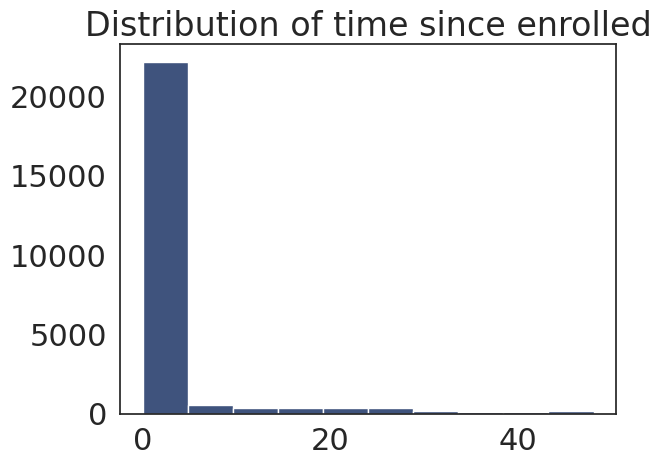

In [28]:
# PLot histogram for only the 48 hrs 
plt.hist(data['difference'].dropna(), color ='#3F537D', range =[0, 48])
plt.title('Distribution of time since enrolled')
plt.show()

Q. Why are we using the range in histogram

histogram is ranged to get only the customers who has enrolled within 48 hours of first usage of the app, these customers are important as they liked the app and had a good experience thats why they enrolled in such a short period. getting feedback from these customers is important as their experience can help to attract more customers and modify app to handle these things in a better way 

Q. Comment on the new time distribution

Looking at the new time distribution, the shape and skewness of the histogram is same but with lesser ranges (0-48) rather than whole range (~0-2500), this new histogram shows the true picture of the range of customers in focus (those who enrolled between 48 hours of their first visit to the app)

In [29]:
data.loc[data.difference > 48, 'enrolled'] = 0

Q. What is the purpose of the above code

in the above code, all the rows where difference is greater than 48 are getting marked as 0 in enrolled field, as our analysis is only centered for customers who enrolled in the 48 hours of their first visit to the app 

In [30]:
# drop the difference, enrolled date and first open columns from the dataframe
data.drop(columns=['difference', 'first_open', 'enrolled_date'], inplace=True)

Extra Feature Engineering Screens

In [31]:
# Import the most popular screens (screens that the user visited in the first 24 hr. period)
# only one column so convert to an array
top_screens = pd.read_csv("popular_screens.csv").top_screens.values

In [32]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [33]:
# Separate screens into the separate lists
top_screens = list(map(lambda x: x.strip(),top_screens))

In [34]:
# Map screens to fields. We are adding a , so that we can count the screens because there is always going to be 1 less , for all the screen names

data['screen_list'] = data.screen_list.astype(str) + ','

In [35]:
data['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [36]:
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc + ",", "")

In [37]:
data["other"] = data.screen_list.str.count(",")

In [38]:
data= data.drop(columns=['screen_list'])

In [39]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,02:00:00,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,01:00:00,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19:00:00,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16:00:00,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18:00:00,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


Create Funnels

In [40]:
# Funnels
# Information is provided to you
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount"] = data[savings_screens].sum(axis=1)
data = data.drop(columns=savings_screens)

# Credit monitoring screens
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)
data= data.drop(columns=cm_screens)
# Credit card screens
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)
 # Loan screens
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)


In [41]:
# verify screens
verify_screens = ["VerifyPhone",
               "BankVerification",
               "VerifyDateOfBirth",
               "VerifyCountry","VerifyMobile",
               "VerifyHousing","VerifyHousingAmount","VerifyAnnualIncome" ,"VerifyIncomeType" ]
data["verify_count"] = data[verify_screens].sum(axis=1)
data = data.drop(columns=verify_screens)

In [42]:
profile_screens = ["ProfilePage","EditProfile","ProfileMaritalStatus","ProfileChildren","ProfileEducation","ProfileEducationMajor",
               "ProfileJobTitle",
               "ProfileEmploymentLength" ]
data["profile_count"] = data[profile_screens].sum(axis=1)
data = data.drop(columns=profile_screens)

In [43]:
data.dtypes

user                     int64
dayofweek                int64
hour                    object
age                      int64
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
liked                    int64
location                 int64
Institutions             int64
Cycle                    int64
idscreen                 int64
Splash                   int64
RewardsContainer         int64
Finances                 int64
Alerts                   int64
Leaderboard              int64
RewardDetail             int64
Rewards                  int64
AccountView              int64
Login                    int64
WebView                  int64
SecurityModal            int64
ResendToken              int64
TransactionList          int64
NetworkFailure           int64
ListPicker               int64
other                    int64
SavingCount              int64
CMCount                  int64
CCCount                  int64
LoansCou

In [44]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount,verify_count,profile_count
0,235136,3,02:00:00,23,15,0,0,0,0,0,...,0,0,0,7,0,0,0,1,2,0
1,333588,6,01:00:00,24,13,0,0,0,0,1,...,0,0,0,5,0,0,0,1,3,0
2,254414,1,19:00:00,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,234192,4,16:00:00,28,40,0,0,1,0,1,...,0,0,0,6,0,3,0,1,2,0
4,51549,1,18:00:00,31,32,0,0,1,1,0,...,0,0,0,10,0,2,0,1,3,0


In [45]:
data.to_csv('new_appdata.csv', index = False) # Save the cleaned file

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>